**WINE DATA ANALYSIS**

Dataset from: https://archive.ics.uci.edu/ml/datasets/Wine

**INTRODUCTION**

We will be using the dataset "wine", from the url: https://archive.ics.uci.edu/ml/datasets/wine/wine.data

The "wine" dataset contains the data of 13 attributes of wines, created from the same region of Italy, created from 3 different cultivars (cultivar 1, 2, and 3). A cultivar is a plant or fruit variety that has been cultivated for specific characteristics through selectively breeding. There is no information on what type of plant/fruit these cultivars are, therefore there is not enough information about the dataset to determine whether these 3 cultivars are 3 distinct plants/fruits, or 3 varieties of the same fruit/plant. After a chemical analysis has been performed on the wine, 13 chemical attributes, such as alcohol content, color intensity, hue, and amount of magnesium content, have been determined, however the units associated with each of these variables have not been provided by the dataset source. With each of these 13 attributes, we will be able to create a classification model which predicts which of the 3 cultivars a wine originates from based on it’s chemical breakdown, answering the question we have divised for our project, “What cultivar does a wine belong to, based on it’s chemical breakdown?"

**Methods & Results**

describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

your report should include code which:
1. loads data from the original source on the web (**COMPLETE**)
2. wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    - mostly clean and wrangled?
    - raw data does not include column titles
        - added titles, and converted categorical variable to a factor

3. performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
    - Used ggpairs to determine which predictor variables are most useful for prediction by viewing correlation between each predictor variable and our Cultivar Categorical variable
    - after picking most correlated variables, we should compute some summary statistics
        - Feedback from proposal suggests to explore not just the mean, but to look at the min, max, standard deviation, etc

4. creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
5. performs the data analysis
    - performed initial split of data
    - performed cross validation and experimented with k values ranging from 1-50 to find the best k value for our model
        - 34 neighbours is best k value
    - created classification model and tested accuracy, with confusion matrix
    
6. creates a visualization of the analysis 
    - note: all tables and figure should have a figure/table number and a legend
    
    **Feedback from our project proposal**

Mechanics:
- Well done reading the data off of a URL.
- Try showing more summary statistics apart from just the mean. Looking at the min, max, standard deviation, etc. would also be useful.

Reasoning:
- Great introduction.
- Summary tables are included, but not explained. You should explain why the summary statistics are relevant, or what they mean in regards to your analysis. What can you derive from your summary table?
- No explanation or justification for the visualizations given. It is important to explain the significance of the plots as alone they do not give much insight. For example, what do the scatterplots tell you? Why is it relevant to plot the variables that you chose? Why did you not plot all pairs of numeric variables instead of only two?
- You should verify that each variable/predictor is associated with your target variable in some way or another. You can not assume that each column will be automatically beneficial for your classifier; you need to verify this claim.
- Nice expected outcome and significance.

Writing:
- Notebook flows smoothly.
- No outstanding spelling or grammar mistakes.
- No need to explain the methods section so in-depth. We do not need a step by step run through; that's what the code is for.

The following code loads the necessary libraries used to execute our code, and sets a seed for our file, so that our results are reproducible.

In [1]:
set.seed(2022)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
library(data.table)
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)
options(repr.plot.height = 20, repr.plot.width = 20)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts(

The following code is used to load the wine dataset from the original source url on the web, wrangle and clean the data by assigning the columns' names, and create a ggpairs graph to determine which predictor variables correlate most to our target variable "Cultivar".

Cultivar,Alcohol,Malic_Acid,Ash,Alcalinity_Of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_Of_Dilluted_Wines,Proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


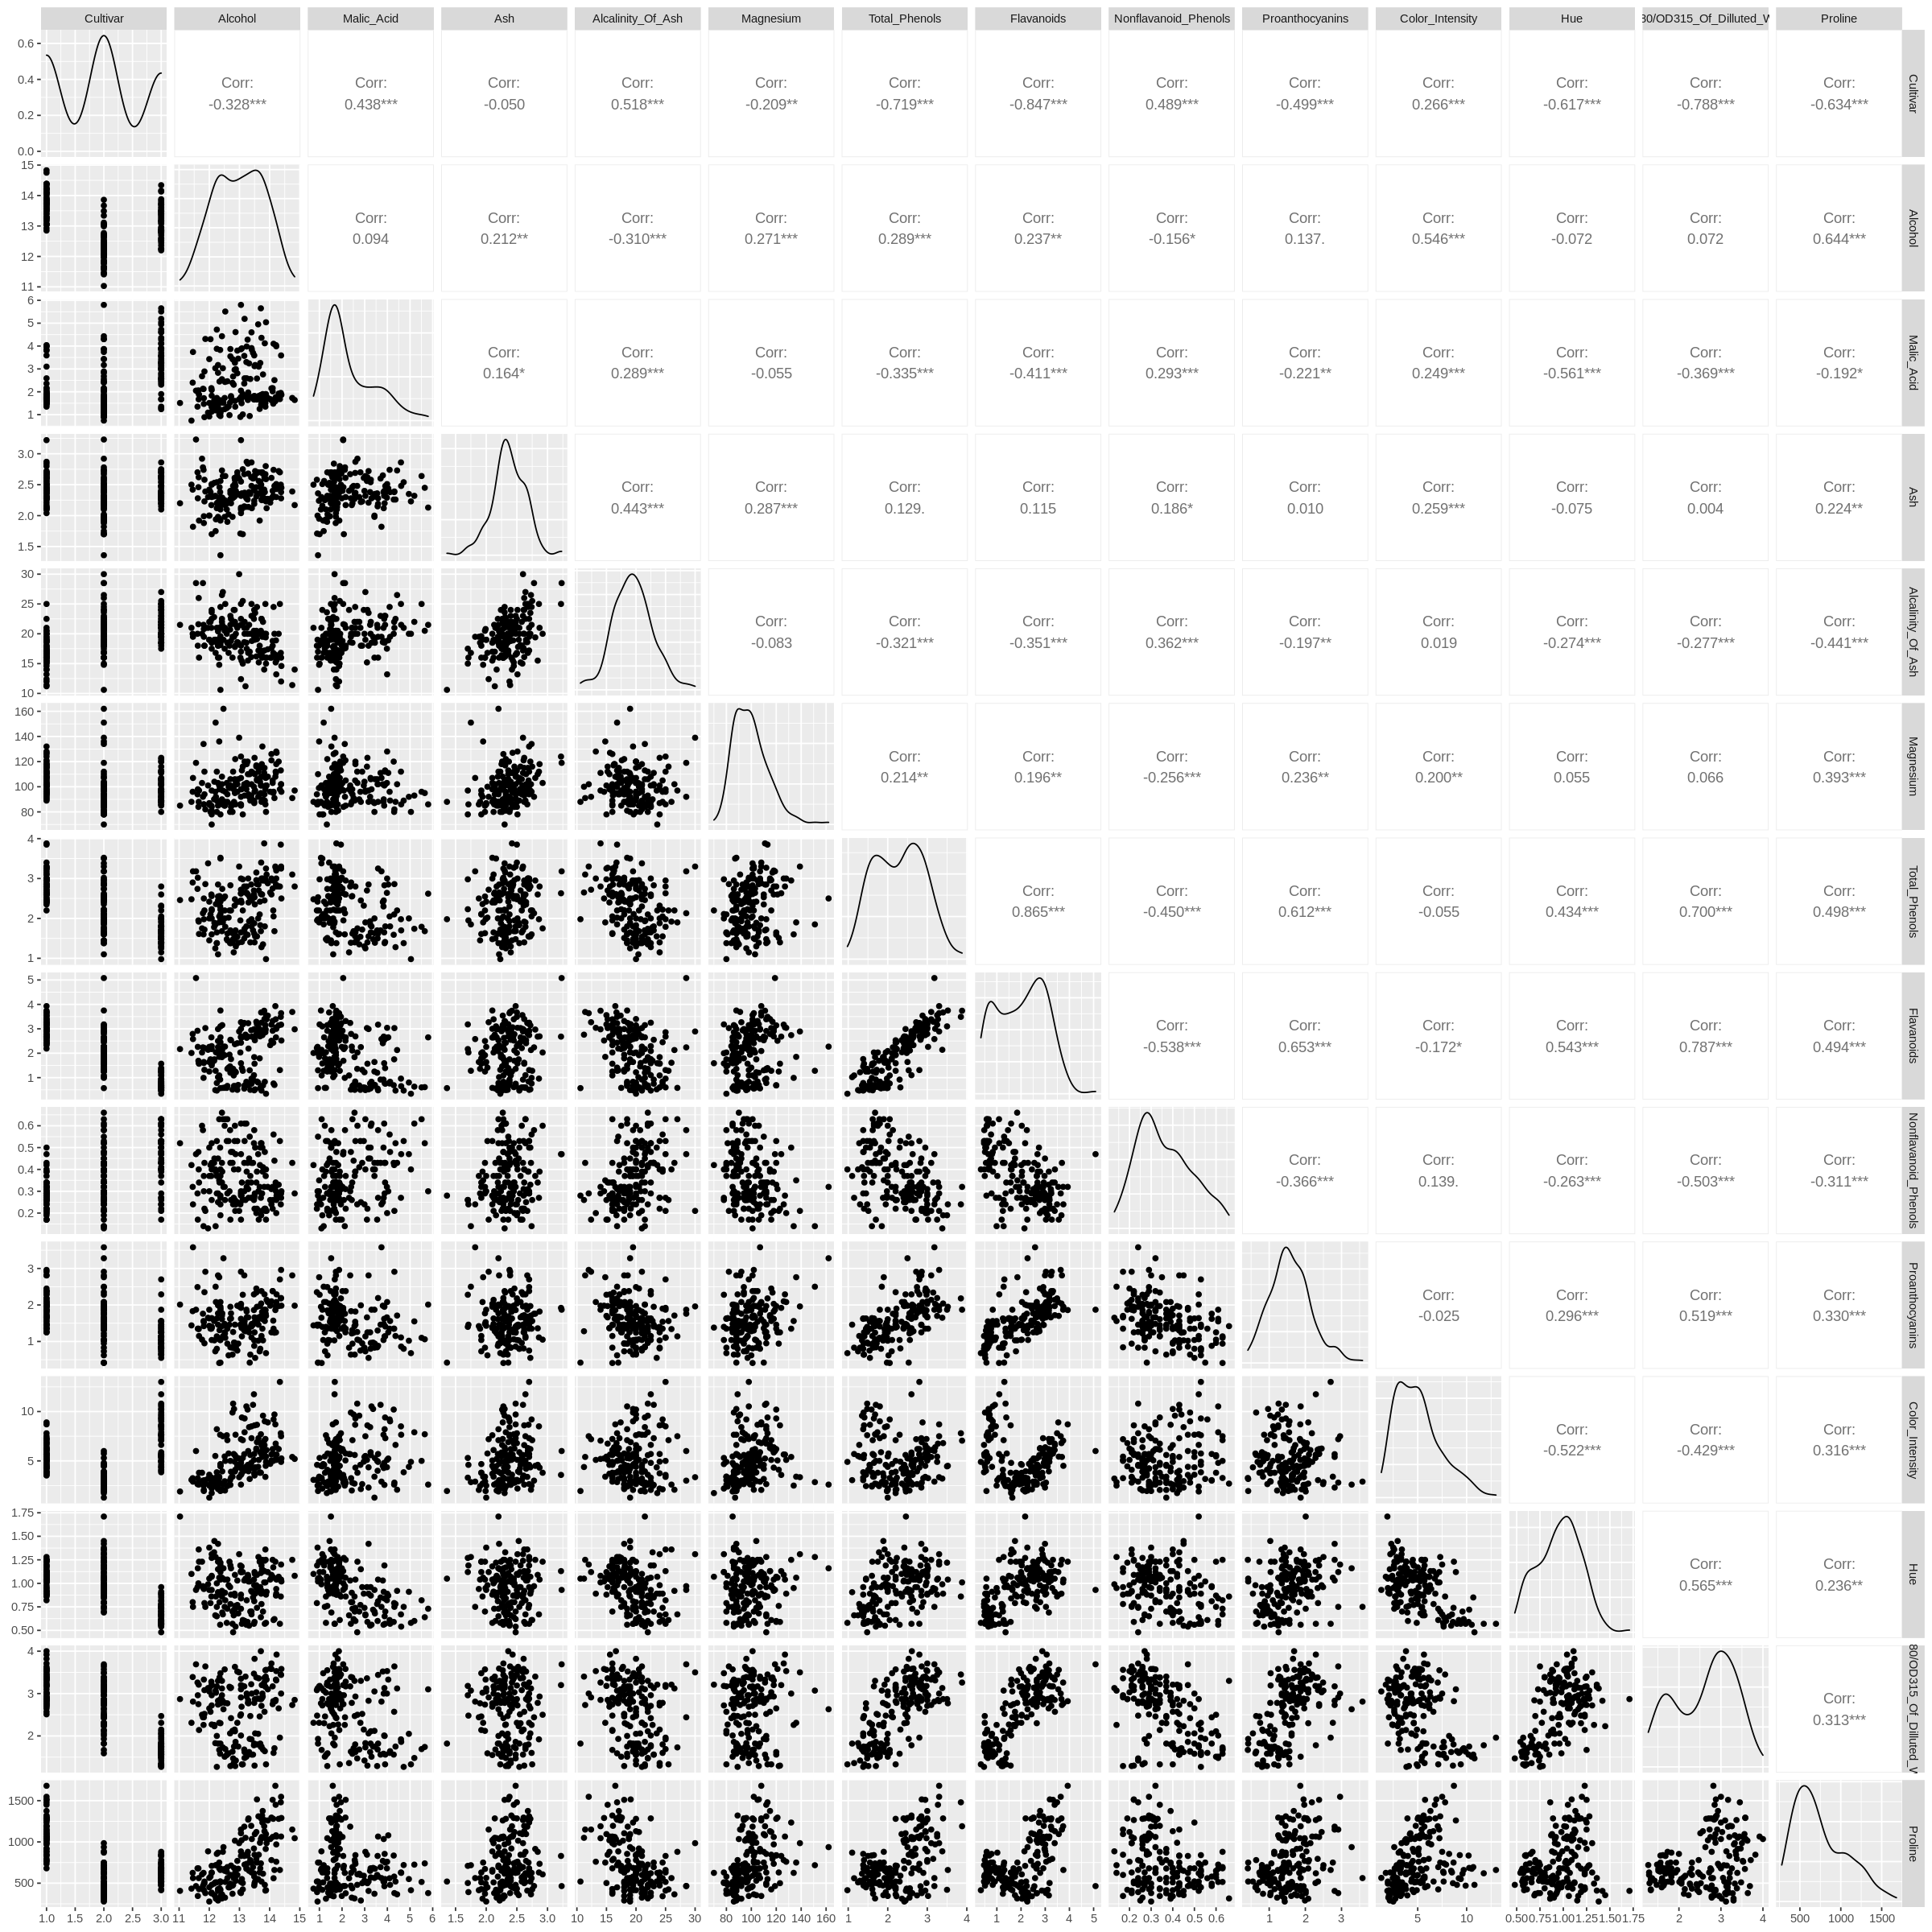

In [2]:
set.seed(2022)

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

wine <- fread(url)

colnames(wine) <- c("Cultivar","Alcohol","Malic_Acid","Ash","Alcalinity_Of_Ash","Magnesium","Total_Phenols","Flavanoids","Nonflavanoid_Phenols","Proanthocyanins","Color_Intensity","Hue","OD280/OD315_Of_Dilluted_Wines","Proline")

head(wine)

ggpairs(wine)

*Figure 1: A matrix of plots of the Wine dataset, showing correlation relationship between each variable*

Looking at the predictors most correlated to our target variable "cultivar", we decided to use the 4 predictor variables with the highest correlation for our data summary and analysis, Flavanoids with -0.847 correlation, OD280/OD315 of diluted wines with -0.788 correlation, total phenols with -0.719, and proline with -0.634 correlation.

The following code creates a dataset with only those 4 predictors, changes the Cultivar target variable from a integer to a factor, performs an 75:25 ratio intial split, and performs a summary analysis of the dataset, computing the mean, max, min, and standard deviation of the 4 predictor variables we are using in our analysis.

In [3]:
#data summary
set.seed(2022)
wine_data <- wine |>
        select(Flavanoids, "OD280/OD315_Of_Dilluted_Wines", Total_Phenols, Proline, Cultivar) |>
        mutate(Cultivar = as_factor(Cultivar))

head(wine_data)

wine_split <- initial_split(wine_data, prop = 0.75, strata = Cultivar)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

wine_summary_analysis <- wine_data |>
        pivot_longer(cols = Flavanoids:Proline, names_to = "variable", values_to = "value") |>
        group_by(variable) |>
        summarize(mean = mean(value), max = max(value), min = min(value),sd = sd(value))

Flavanoids,OD280/OD315_Of_Dilluted_Wines,Total_Phenols,Proline,Cultivar
<dbl>,<dbl>,<dbl>,<int>,<fct>
3.06,3.92,2.80,1065,1
2.76,3.40,2.65,1050,1
3.24,3.17,2.80,1185,1
3.49,3.45,3.85,1480,1
2.69,2.93,2.80,735,1
3.39,2.85,3.27,1450,1


In [4]:
wine_summary_analysis

variable,mean,max,min,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Flavanoids,2.029270,5.08,0.34,0.9988587
OD280/OD315_Of_Dilluted_Wines,2.611685,4.00,1.27,0.7099904
Proline,746.893258,1680.00,278.00,314.9074743
Total_Phenols,2.295112,3.88,0.98,0.6258510


*Figure 2: Data Table containing summary data about the 4 predictor variables we picked to use, displaying mean, max, min, and standard deviation of each variable*

The data summary table above shows mean, max, min of each variable, and most importantly, the range of of distribution for each variable through maximum and minimum values through the standard deviation. The standard deviation tells us how dispersed the values are from the mean value of the variables. These summary statistics are relevant because by computing these values, it gives us a approximation of the range and distribution of values for each variable 

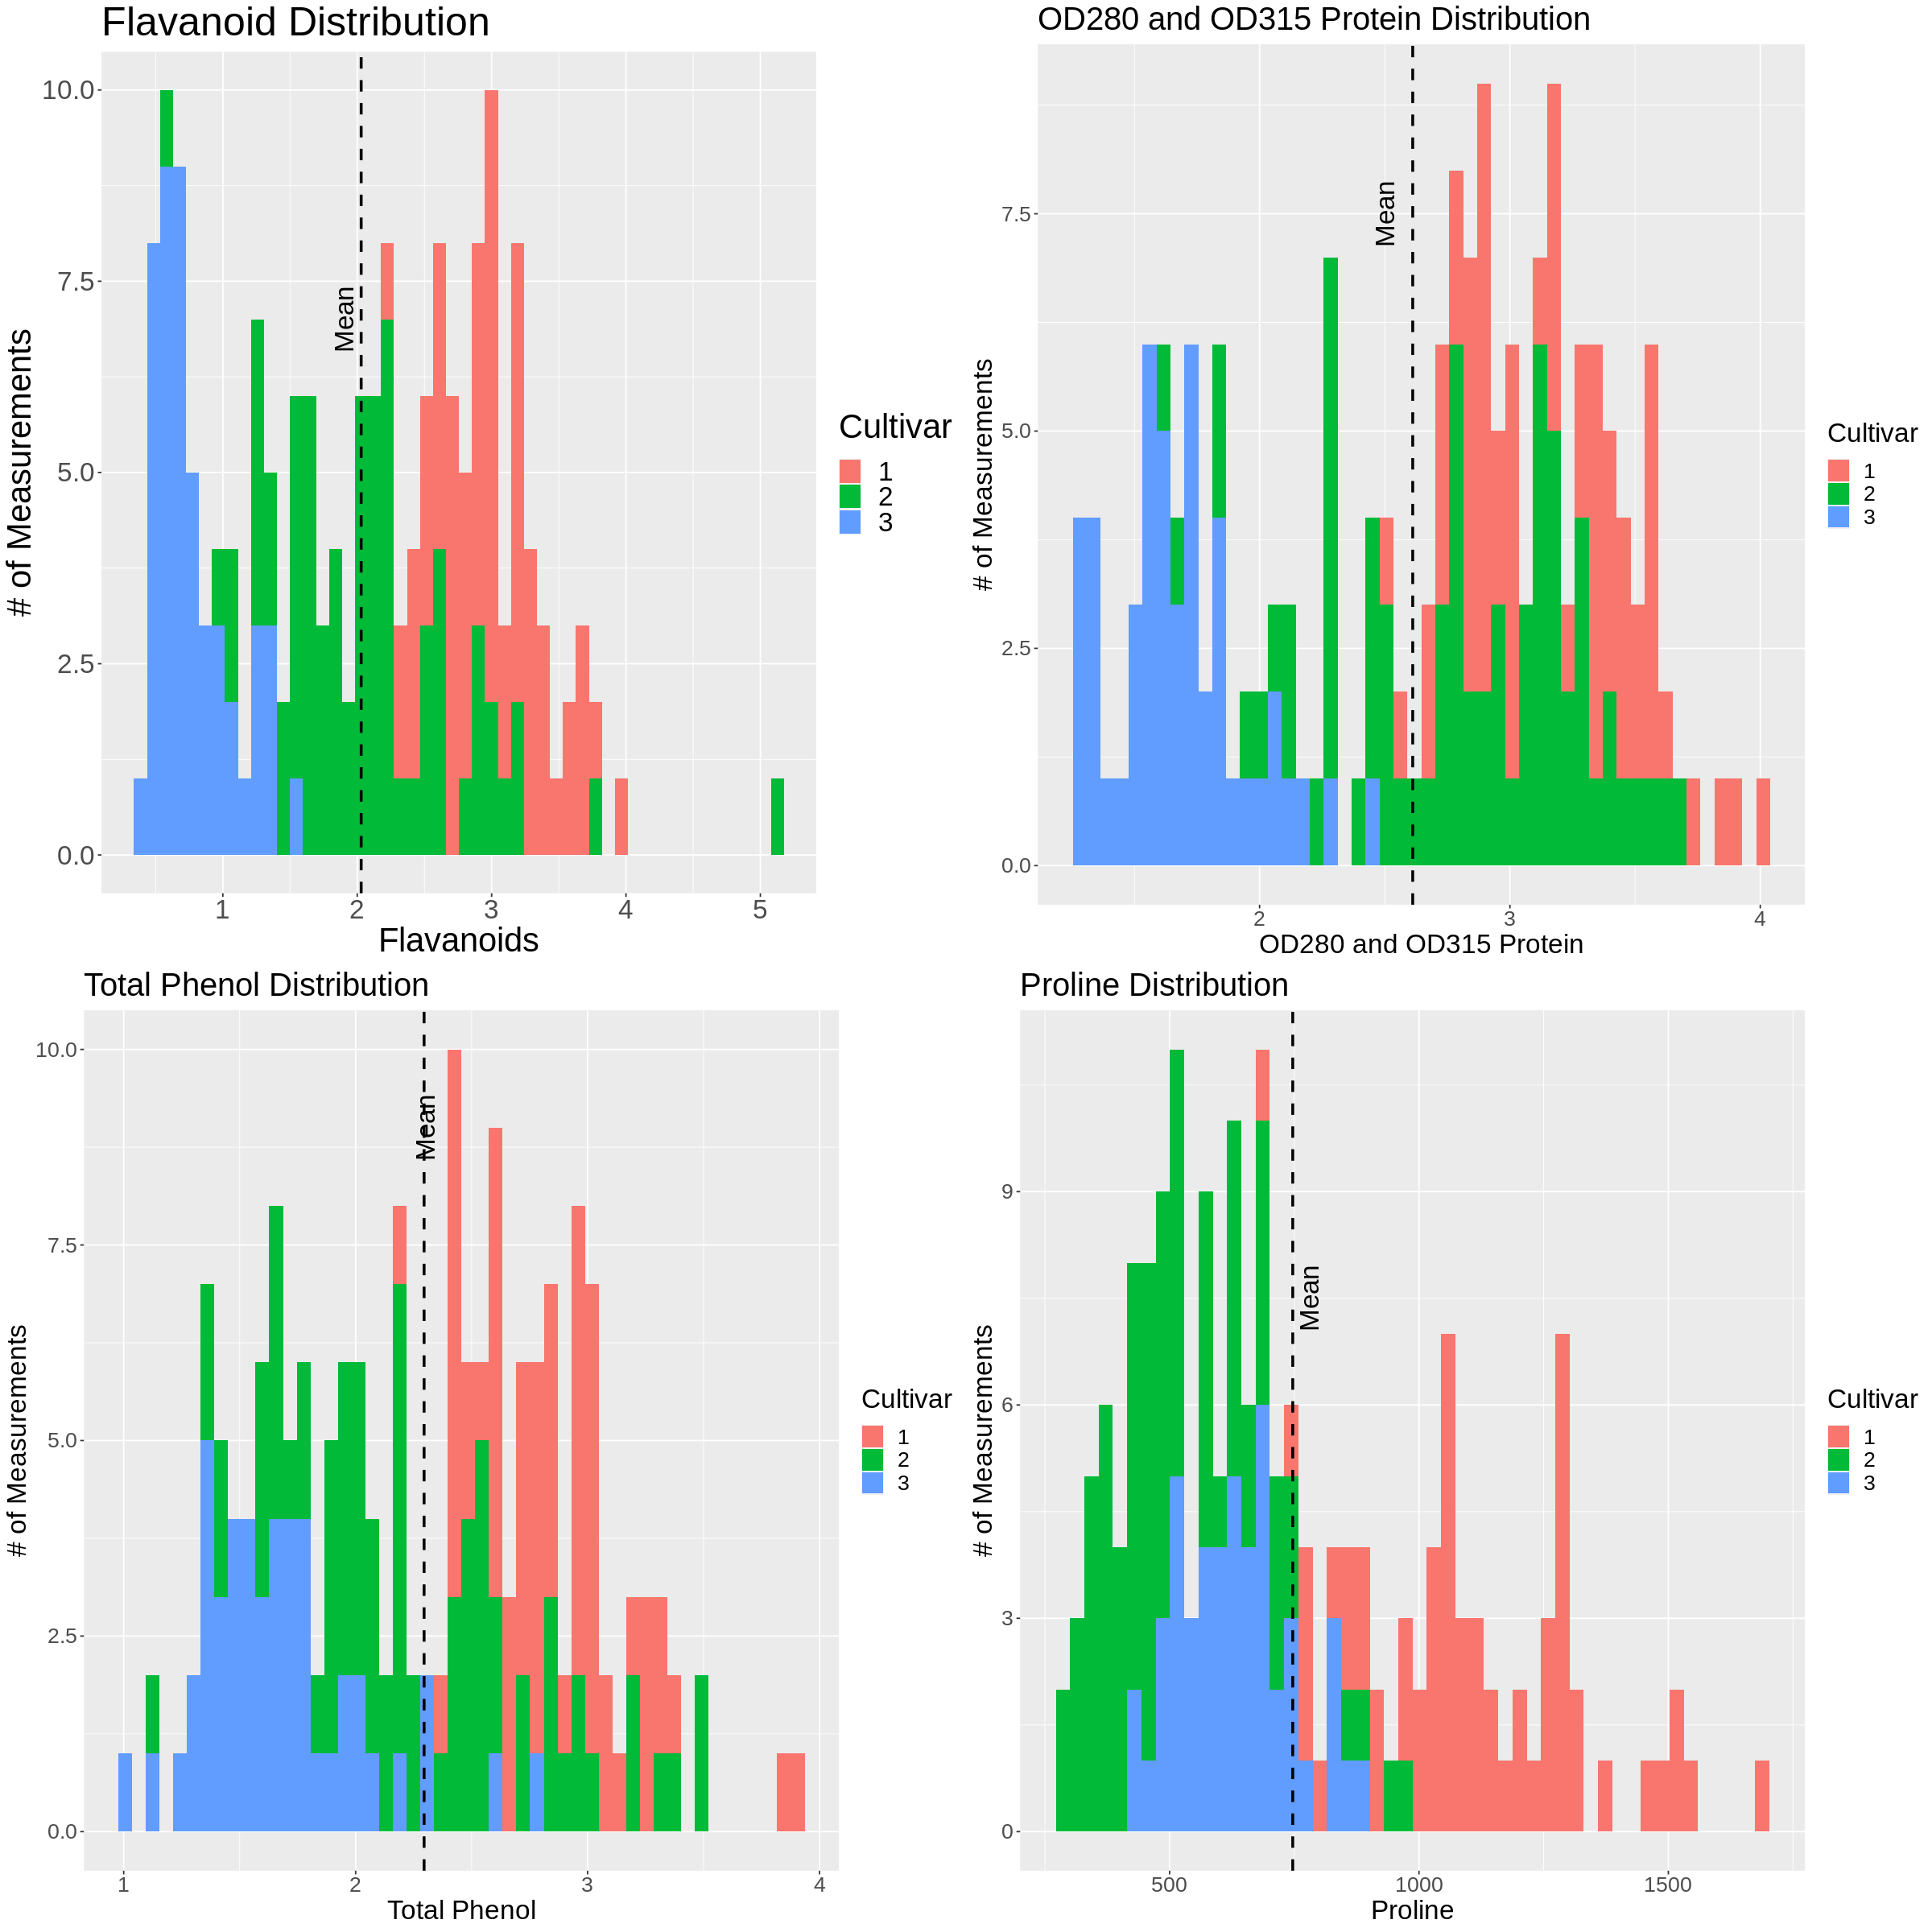

In [5]:
options(repr.plot.height = 20, repr.plot.width = 20)

flavanoid_summary_plot <- wine_data |>
    ggplot(aes(x = Flavanoids, fill = Cultivar)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = 2.029270, linetype = "dashed", size = 1) +
    annotate("text", x = 1.9, y = 7, label = "Mean", angle = 90, size = 7) +
    labs(x = "Flavanoids", y = "# of Measurements") +
    ggtitle("Flavanoid Distribution") +
    theme(text = element_text(size = 25))

OD280_summary_plot <- wine_data |>
    ggplot(aes(x = wine_data$"OD280/OD315_Of_Dilluted_Wines", fill = Cultivar)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = 2.611685, linetype = "dashed", size = 1) +
    annotate("text", x = 2.5, y = 7.5, label = "Mean", angle = 90, size = 7) +
    labs(x = "OD280 and OD315 Protein", y = "# of Measurements") +
    ggtitle("OD280 and OD315 Protein Distribution") +
    theme(text = element_text(size = 20))

proline_summary_plot <- wine_data |>
    ggplot(aes(x = Proline, fill = Cultivar)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = 746.893258, linetype = "dashed", size = 1) +
    annotate("text", x = 780, y = 7.5, label = "Mean", angle = 90, size = 7) +
    labs(x = "Proline", y = "# of Measurements") +
    ggtitle("Proline Distribution") +
    theme(text = element_text(size = 20))

phenol_summary_plot <- wine_data |>
    ggplot(aes(x = Total_Phenols, fill = Cultivar)) +
    geom_histogram(bins = 50) +
    geom_vline(xintercept = 2.295112, linetype = "dashed", size = 1) +    
    annotate("text", x = 2.3, y = 9, label = "Mean", angle = 90, size = 7) +
    labs(x = "Total Phenol", y = "# of Measurements") +
    ggtitle("Total Phenol Distribution") +
    theme(text = element_text(size = 20))

plot_grid(flavanoid_summary_plot, OD280_summary_plot, phenol_summary_plot, proline_summary_plot, ncol = 2, nrow = 2)

The following code will split and crossvalidate our training data, create a recipe based on the training data which also scales and centers the data, create a classification k-nearest neighbors model which will be tuned for the best possible value of k, estimates the accuracy of the classifier model based on many k values ranging from 1 to 50, and create a line graph comparing classifier accuracy and k values.

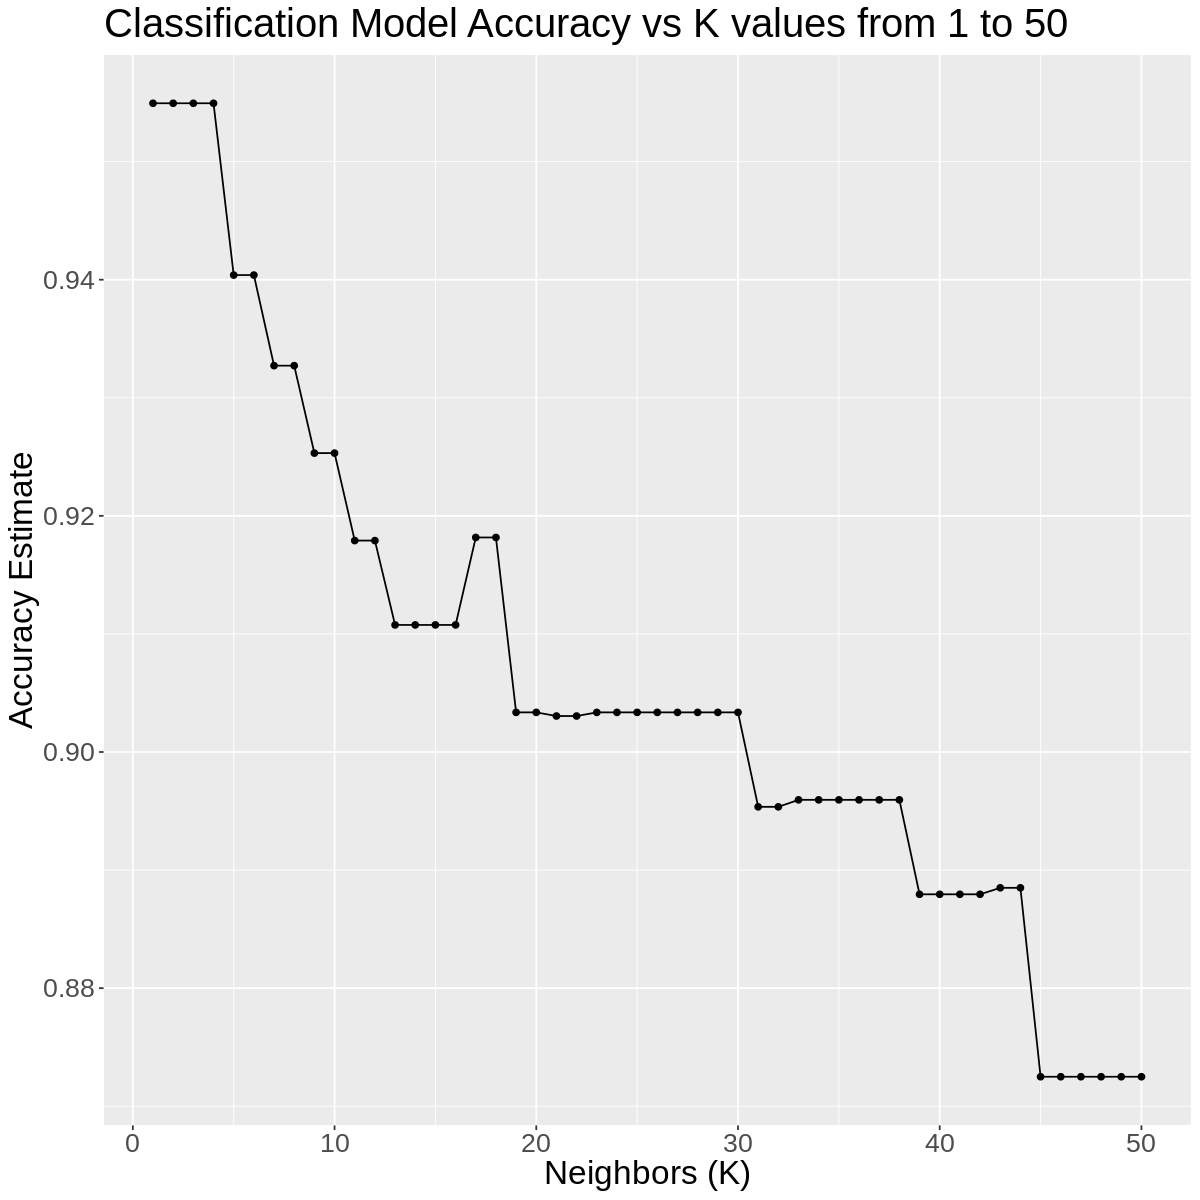

In [6]:
# data analysis
set.seed(2022)
options(repr.plot.height = 10, repr.plot.width = 10)

wine_vfold <- vfold_cv(wine_training, v = 5, strata = Cultivar)

wine_recipe <- recipe(Cultivar ~ ., data = wine_training) |>
            step_scale(all_predictors()) |>
            step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

knn_results <- workflow() |>
            add_recipe(wine_recipe) |>
            add_model(knn_tune) |>
            tune_grid(resamples = wine_vfold, grid = k_vals) |>
            collect_metrics() |>
            filter(.metric == "accuracy")

cross_val_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors (K)", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) +
    ggtitle("Classification Model Accuracy vs K values from 1 to 50")

cross_val_plot

The following code displays the top 5 values of K which nets us the highest estimated model accuracy.

In [7]:
best_k <- knn_results |>
        arrange(desc(mean)) |>
        head(1)

best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9549426,5,0.007289273,Preprocessor1_Model01


Based on our Model Accuracy vs K graph, and the table above which shows the 5 neighbour K values which give the highest model accuracy, the best K value would be any K value from 1 to 4. 

This is because these 4 K values fulfill the attributes of a best K value for a classifier model:
- It gives roughly the most optimal accuracy (highest accuracy) out of the range of K values we picked to be tested
- Changing the K value to a one nearby (e.g., adding or subtracting a small number) doesn’t decrease or affect accuracy too much
    - this means the K value is reliable in uncertainty
- It is a small number, so it does not require too many resources from the server to use the model

Therefore, we will be picking the K value of 1, as our neighbor parameter.

The following code creates a classification model specification with the best parameter of K neighbors, which we established earlier could be any value from 1 to 4, but we will be using 1 in our code. The code also retrains the classifier model based on the specification and training data, applies the classifier model on the testing data, and evaluates the accuracy of the classifier model when it is applied to the test set, by both computing it, and creating a confusion matrix.

In [8]:
set.seed(2022)
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 1) |>
                  set_engine("kknn") |>
                  set_mode("classification")

wine_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = wine_training)

wine_predictions <- predict(wine_fit, wine_testing) |> 
    bind_cols(wine_testing)

wine_acc <- wine_predictions |> 
    metrics(truth = Cultivar, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head()

wine_cm <- wine_predictions |> 
    conf_mat(truth = Cultivar, estimate = .pred_class)

wine_acc

wine_cm

.metric,.estimate
<chr>,<dbl>
accuracy,0.8666667
kap,0.7986577


          Truth
Prediction  1  2  3
         1 15  1  0
         2  0 14  2
         3  0  3 10

The confusion matrix shows a table of observations of predicted and correct cultivars. It is useful for finding out what the model classified correctly and incorrectly. As shown in the table above, for cultivar 1, all predictions were correct. For cultivar 2, 14/18 predictions were corrected, and 10/12 were correct for cultivar 3. 

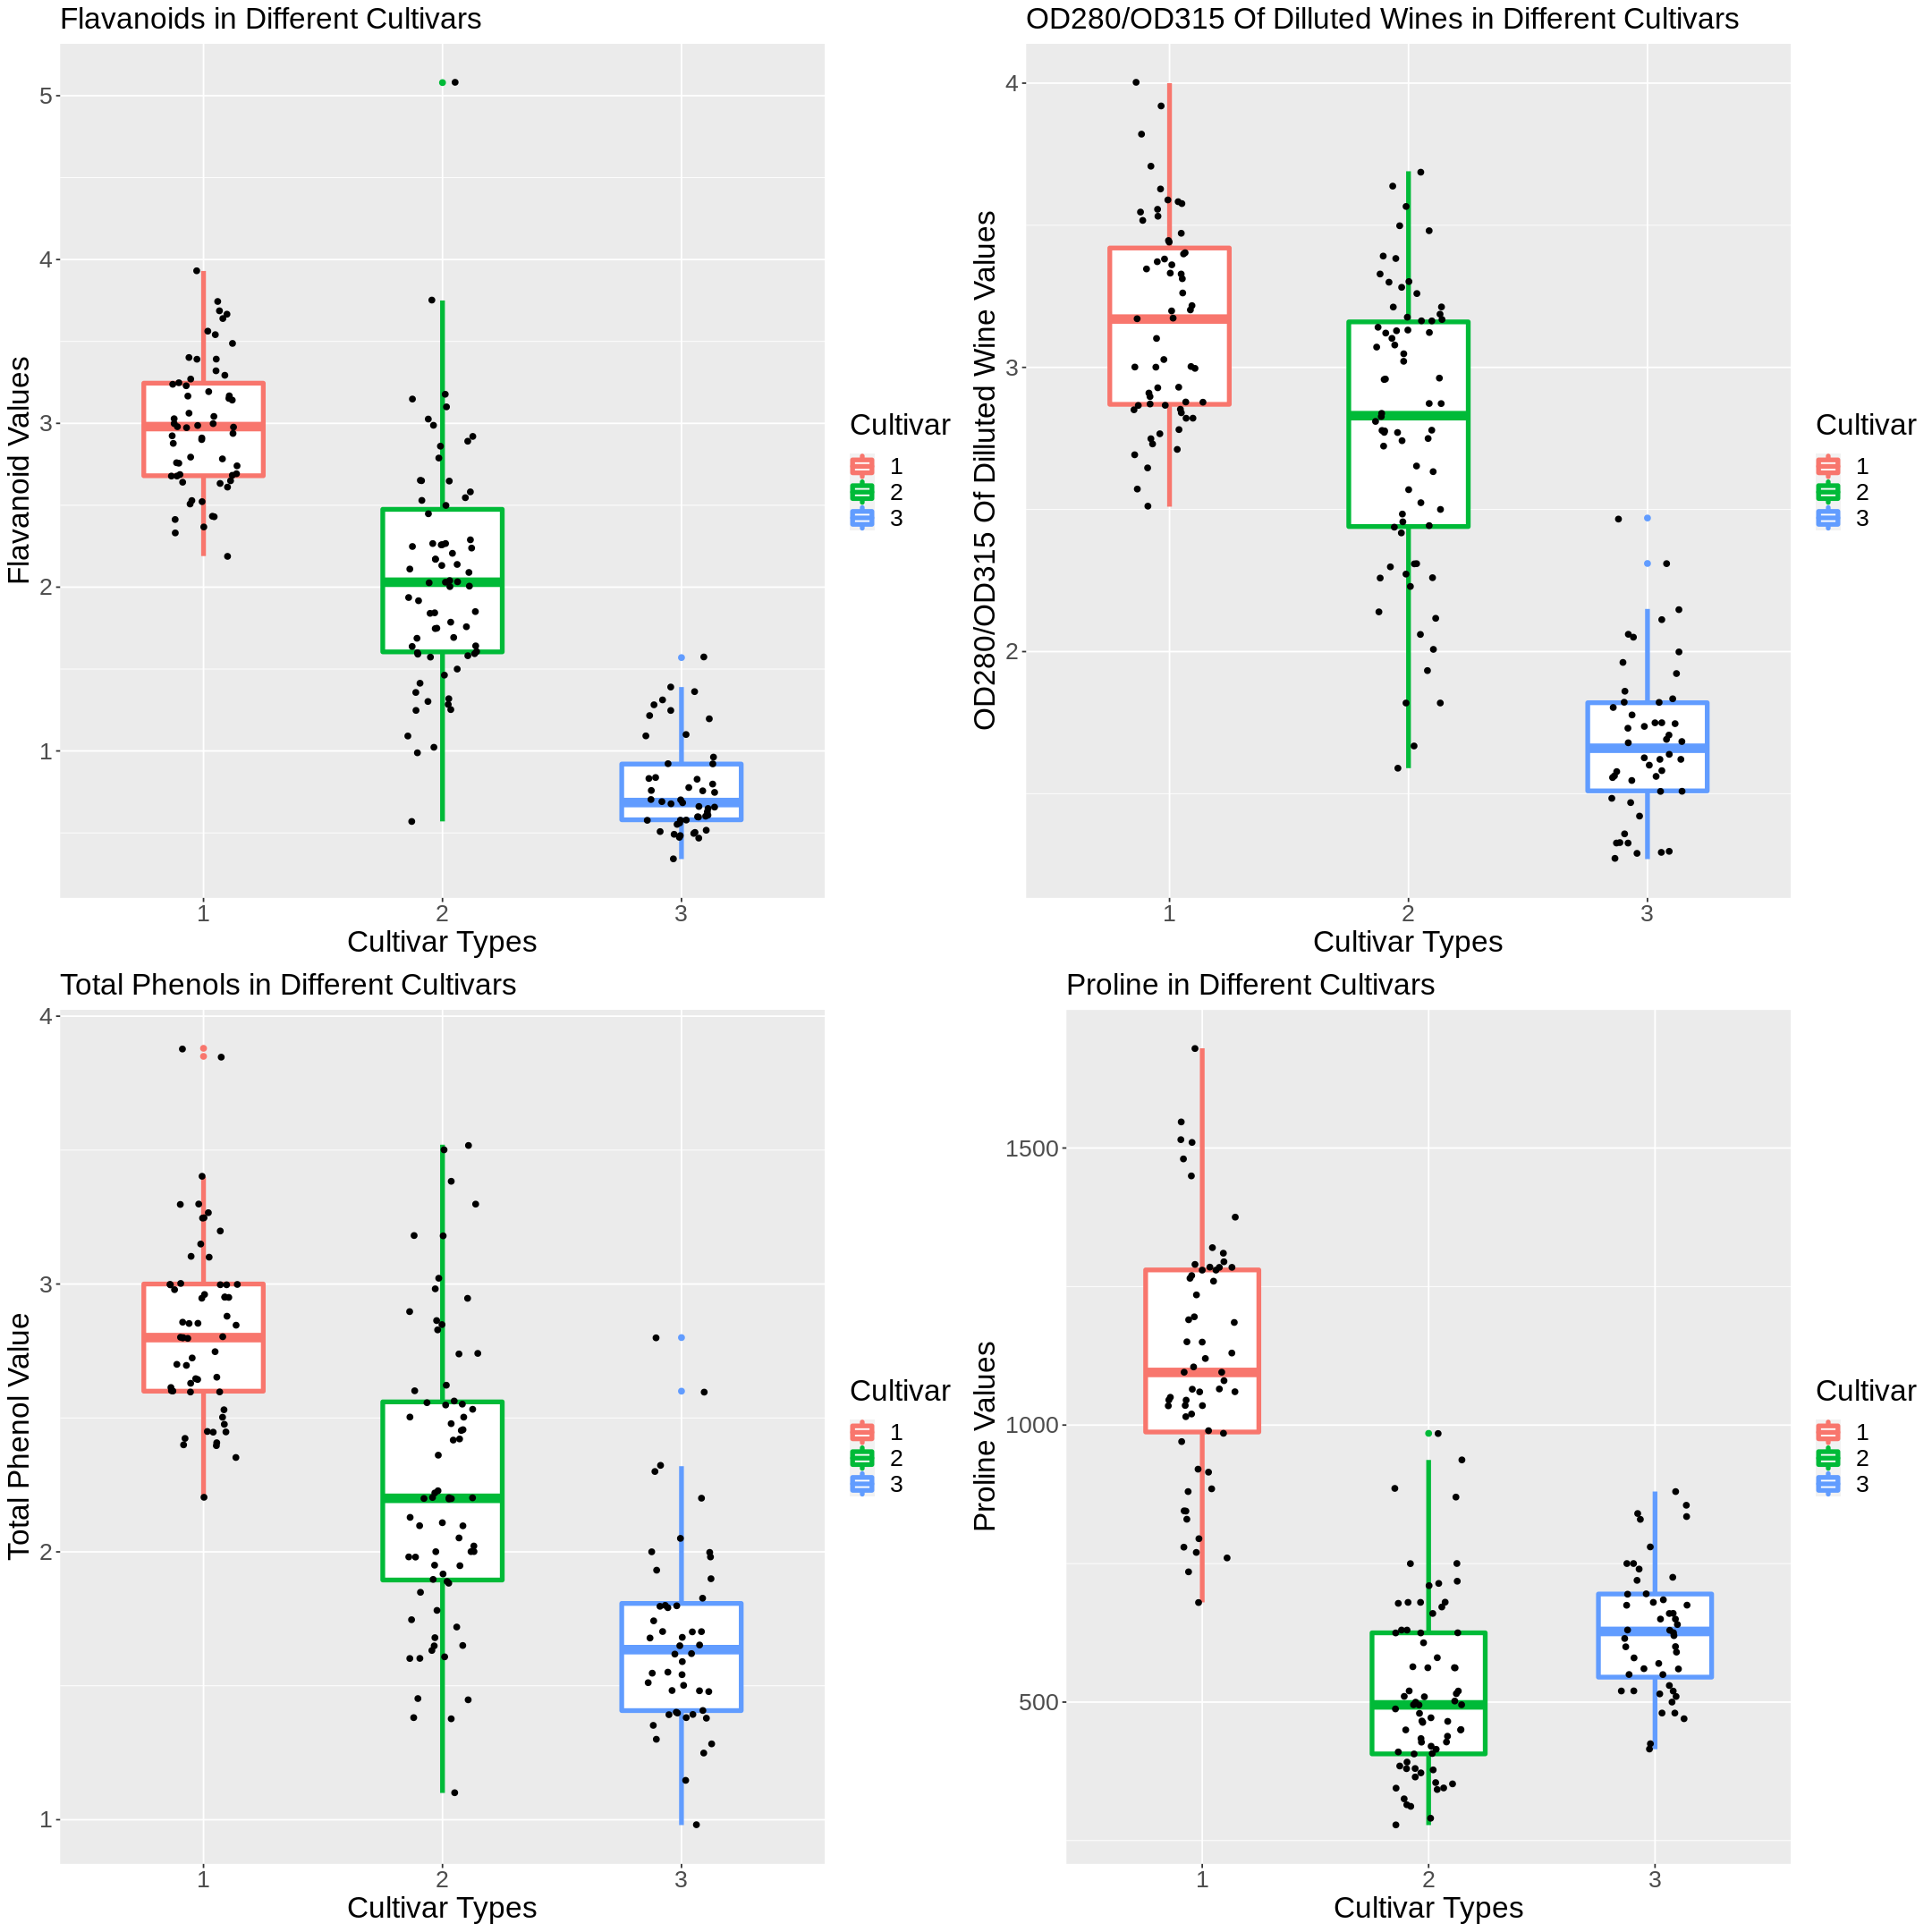

In [9]:
#visualization of dataset
options(repr.plot.height = 18, repr.plot.width = 18)

flavanoid_plot <- wine_data |>
    ggplot(aes(x = Cultivar, y = Flavanoids)) +
    geom_boxplot(width = 0.5, lwd = 1.5, aes(color=Cultivar)) +
    geom_jitter(width=0.15) +
    labs(x = "Cultivar Types", y = "Flavanoid Values", subtitle = "Flavanoids in Different Cultivars") +
    theme(text = element_text(size = 20))

OD280_plot <- wine_data |>
    ggplot(aes(x = Cultivar, y = wine_data$"OD280/OD315_Of_Dilluted_Wines")) +
    geom_boxplot(width = 0.5, lwd = 1.5, aes(color=Cultivar)) +
    geom_jitter(width=0.15) +
    labs(x = "Cultivar Types", y = "OD280/OD315 Of Dilluted Wine Values", subtitle = "OD280/OD315 Of Dilluted Wines in Different Cultivars") +
    theme(text = element_text(size = 20))

phenol_plot <- wine_data |>
    ggplot(aes(x = Cultivar, y = Total_Phenols)) +
    geom_boxplot(width = 0.5, lwd = 1.5, aes(color=Cultivar)) +
    geom_jitter(width=0.15) +
    labs(x = "Cultivar Types", y = "Total Phenol Value", subtitle = "Total Phenols in Different Cultivars") +
    theme(text = element_text(size = 20))

proline_plot <- wine_data |>
    ggplot(aes(x = Cultivar, y = Proline)) +
    geom_boxplot(width = 0.5, lwd = 1.5, aes(color=Cultivar)) +
    geom_jitter(width=0.15) +
    labs(x = "Cultivar Types", y = "Proline Values", subtitle = "Proline in Different Cultivars") +
    theme(text = element_text(size = 20))

plot_grid(flavanoid_plot, OD280_plot, phenol_plot, proline_plot, ncol = 2, nrow = 2)

**Boxplot Graph:**

The box plot shows us the lower, upper quartiles as well as the interquartile, which is the area covered by the box that represents where the %50 of the data is located. It also shows us the median value, the thin line inside the box. Also, box plot allows us to visualize the dispersion of the data. For this specific case, box plot shows us that the Cultivar Type 1 has the highest values, evaluating by their means values, for the 4 descriptive attributes, Flavanoid, OD280/OD315 Of Dilluted Wines, Total Phenols, Proline. At the same time, Cultivar Type 2’s attributes have the widest range, except Proline values. Also, Cultivar Type 3 has the lowest mean values, except Proline values, and generally has the most narrow range among the 3 cultivar types.

**Discussion:**
Summarize what you found:

We have found that the 4 predictor variables, Flavanoids, OD280/OD315 Of Diluted Wines, Total Phenols, and Proline, have the strongest relationship and correlation with our target variable, Cultivar. 
In our summary exploratory analysis of the dataset, we have determined the mean, max, min, and standard deviation of the four chosen predictor variables
By creating a boxplot which explores the range of values of each predictor variable which determines which cultivar it belongs to, and creating a classification model which predicts which cultivar a wine belongs to based on the values of it’s predictor values, we have determined the range of values which catagorized which cultivar a wine belongs to.
Our report is able to answer the proposed question, ‘What cultivar does a wine belong to, based on it’s chemical breakdown?’. From our data exploration, we identified the most significantly correlated variables with the type of cultivars. As expected, with further classification analysis, it became clear that we are able to distinguish the cultivar based on given variables. The accuracy of the model is 86.7%


Discuss whether this is what you expected to find?

We originally expected to find ways to predict the original plant cultivars the wines were produced from.  As stated above we have found 4 variables, that have the highest correlation and thus the strongest relations to predict which cultivars the wines are coming from.

Discuss what impact could such findings have?

By comparing chemical observations, we would be able to determine whether or not a wine is authentically based in Italian, based on if it uses Italian-specific cultivars
The determination of cultivar based on its chemical properties can be used as evidence as the first step to prove scandal / false advertisement / misconductions of companies or factories for wine production / identification of the wine based on its properties, etc.
For example, if a wine is being advertised as a specific type of cultivar, using the cultivar as a reason for unfair pricing, and the cultivar isn’t what they said it to be, the classification of its chemical property can be proposed as sample evidence to pursue further investigations
It can also be helpful for future studies on the properties of these cultivars

Discuss what future questions could this lead to?

Do the chemical characteristics of these wines suggest that they originate from the same type of fruit, (ex. 3 different cultivars of grapes), or 3 distinct fruits?
Are there any factors that can affect the chemical properties of the wine? If so, how? By how much?
Which properties would the factor(s) affect? Would it affect the prediction accuracy for classification model?
If there are multiple factors, how would they influence the effects of one another?
Examples of affecting factors:
could be time, storing environment (humidity, pressure, temperature, human handling, etc)
production method and details (fermentation method and time, fruit used (growth conditions, size, origin), etc. ).


**References**

At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well.

- “A Comparison of Credit Rating Classification Models Based on Spark- Evidence from Lending-club” by Bai Ruyu, Hai Mo and Li Haifeng is a report paper about different approaches to classification methods, using data from an American P2P platform on credit assessment data. This paper shows how different approaches perform and what are their strengths and weaknesses.

    Ruyu, B., Haifeng, L., &amp; Mo, H. (2019, December 31). A comparison of credit rating classification models based on spark- evidence from lending-club. ScienceDirect. Retrieved December 6, 2022, from https://www.sciencedirect.com/science/article/pii/S1877050919320654, doi:https://doi.org/10.1016/j.ijin.2020.07.003
    
    

- “A novel data science application approach for classification of nutritional composition, instrumental colour, texture and sensory analysis of bael fruit (Aegle marmelos (L) correa)” by Tanmay Sarkar, Molla Salauddin, Sudipta Kumar Hazra, Runu Chakraborty is a report on applying classification method on nutritional and sensory attribute data of a tropic fruit. Their work shows which attributes, such as sensory attributes, are strongly correlated with nutritional, textural and color attributes.

    Sarkar, T., Salauddin, M., Hazra, S. K., &amp; Chakraborty, R. (2020, August 3). A novel data science application approach for classification of nutritional composition, instrumental colour, texture and sensory analysis of Bael Fruit (Aegle Marmelos (L) correa). International Journal of Intelligent Networks. Retrieved December 6, 2022, from https://www.sciencedirect.com/science/article/pii/S2666603020300105, doi:https://doi.org/10.1016/j.procs.2019.12.054
    
- “UCI Machine Learning Repository: Wine Data Set.” Archive.ics.uci.edu, archive.ics.uci.edu/ml/datasets/wine/wine.data. Accessed 6 Dec. 2022.
